# 第II部
# 第9章 データフレーム

In [2]:
sapply(c("readr", "pipeR", "dplyr", "tidyr", "ggplot2"), require, character.only=TRUE)

Loading required package: pipeR
Loading required package: dplyr

Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: tidyr
Loading required package: ggplot2


readr   pipeR   dplyr   tidyr ggplot2 
   TRUE    TRUE    TRUE    TRUE    TRUE

## 9.2 第2章

In [3]:
d <- read_csv("teaching_methods.csv")
d

,ID,名前,性別,数学,統計,心理学テスト,統計テスト1,統計テスト2,指導法
1,1,大村,男,嫌い,好き,13,6,10,C
2,2,本多,男,嫌い,好き,14,10,13,B
3,3,川崎,男,好き,好き,7,6,8,B
4,4,多村,男,好き,好き,12,10,15,A
5,5,松中,男,嫌い,嫌い,10,5,8,B
6,6,小久保,男,嫌い,嫌い,6,3,6,C
7,7,柴原,男,嫌い,嫌い,8,5,9,A
8,8,井手,男,嫌い,嫌い,15,9,10,D
9,9,田上,男,嫌い,嫌い,4,3,7,D
10,10,松田,男,好き,嫌い,14,3,3,D


In [4]:
d %>>% summarise_each(funs(mean), 6:8)

,心理学テスト,統計テスト1,統計テスト2
1,10,7,10


In [6]:
d %>>% (scale(.$心理学テスト)) %>>% (~ str(.))

 num [1:20, 1] 0.878 1.17 -0.878 0.585 0 ...
 - attr(*, "scaled:center")= num 10
 - attr(*, "scaled:scale")= num 3.42


0.8776504
1.170201
-0.8776504
0.5851003
0
-1.170201
-0.5851003
1.462751
-1.755301
1.170201
-0.2925501


In [9]:
d %>>% (scale(.$心理学テスト)) %>>% (10 * (.) + 50) %>>% (~ str(.))

 num [1:20, 1] 58.8 61.7 41.2 55.9 50 ...
 - attr(*, "scaled:center")= num 10
 - attr(*, "scaled:scale")= num 3.42


58.7765
61.70201
41.2235
55.851
50
38.29799
44.149
64.62751
32.44699
61.70201
47.0745


## 9.3 第3章

In [10]:
options(repr.plot.width = 4, repr.plot.height = 4)

In [16]:
library(Cairo)

pdf 
  2

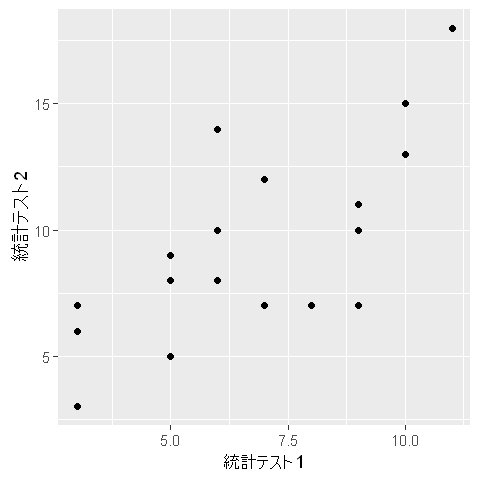

In [18]:
Cairo(type = "raster")
d %>>% 
    ggplot(aes(x = `統計テスト1`, y = `統計テスト2`)) + 
    geom_point() + 
    theme(axis.title = element_text(family="IPAexGothic"))
dev.off()

In [24]:
with(cov(`統計テスト1`, `統計テスト2`), data = d)

[1] 7.947368

In [25]:
with(cor(`統計テスト1`, `統計テスト2`), data = d)

[1] 0.749659

In [26]:
with(table(数学, 統計), data = d)

      統計
数学   嫌い 好き
  嫌い   10    4
  好き    2    4

In [29]:
with(cor(as.integer(数学), as.integer(統計)), data = d)

Warning message:
In is.data.frame(y): NAs introduced by coercionWarning message:
In is.data.frame(x): NAs introduced by coercion

[1] NA

In [30]:
str(d)

Classes 'tbl_df', 'tbl' and 'data.frame':	20 obs. of  9 variables:
 $ ID          : int  1 2 3 4 5 6 7 8 9 10 ...
 $ 名前        : chr  "大村" "本多" "川崎" "多村" ...
 $ 性別        : chr  "男" "男" "男" "男" ...
 $ 数学        : chr  "嫌い" "嫌い" "好き" "好き" ...
 $ 統計        : chr  "好き" "好き" "好き" "好き" ...
 $ 心理学テスト: int  13 14 7 12 10 6 8 15 4 14 ...
 $ 統計テスト1 : int  6 10 6 10 5 3 5 9 3 3 ...
 $ 統計テスト2 : int  10 13 8 15 8 6 9 10 7 3 ...
 $ 指導法      : chr  "C" "B" "B" "A" ...


In [46]:
d %>>% mutate_each(funs(as.factor), 数学:統計) %>>% str

Classes 'tbl_df', 'tbl' and 'data.frame':	20 obs. of  9 variables:
 $ ID          : int  1 2 3 4 5 6 7 8 9 10 ...
 $ 名前        : chr  "大村" "本多" "川崎" "多村" ...
 $ 性別        : chr  "男" "男" "男" "男" ...
 $ 数学        : Factor w/ 2 levels "嫌い","好き": 1 1 2 2 1 1 1 1 1 2 ...
 $ 統計        : Factor w/ 2 levels "嫌い","好き": 2 2 2 2 1 1 1 1 1 1 ...
 $ 心理学テスト: int  13 14 7 12 10 6 8 15 4 14 ...
 $ 統計テスト1 : int  6 10 6 10 5 3 5 9 3 3 ...
 $ 統計テスト2 : int  10 13 8 15 8 6 9 10 7 3 ...
 $ 指導法      : chr  "C" "B" "B" "A" ...


In [45]:
d %>>% 
    mutate_each(funs(as.factor), 数学:統計) %>>% 
    mutate_each(funs(as.integer), 数学:統計) %>>% 
    with(cor(数学, 統計))

[1] 0.3563483